In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

数据集结构
- Feature 1: 年龄 - 申请人的年龄（18-65岁）
- Feature 2: 年收入 - 申请人的年收入（单位：万元）
- Feature 3: 信用评分 - 申请人的信用评分（300-850，分数越高信用越好）
- Feature 4: 不良信用记录 - 申请人是否有不良信用记录（1表示有，0表示没有）
- Label: 信用卡审批结果 - 是否批准信用卡申请（1表示批准，0表示拒绝）

In [71]:
# 加载数据
data = pd.read_csv('./信用卡审批.csv')

# 提取特征和标签
X = data.iloc[:, :-1].values  # 提取前4列作为特征
y = data.iloc[:, -1].values    # 提取最后一列作为标签

# 输出结果
print("特征数组 X:\n", X[-6:])
print("\n标签数组 y:\n", y[-6:])

特征数组 X:
 [[24 27 88  0]
 [39 56 58  1]
 [32 30 82  0]
 [29 33 73  0]
 [42 66 89  1]
 [34 36 80  0]]

标签数组 y:
 [1 0 1 0 1 0]


In [72]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 归一化数据（分类任务不对y进行归一化）
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X_train)

### 逻辑回归

In [73]:
# 创建逻辑回归模型
model = LogisticRegression(max_iter=1000, penalty=None, random_state=42)

# 训练模型
model.fit(X_normalized, y_train)

# 预测测试集
y_pred = model.predict(scaler_X.transform(X_test))

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.2f}")

# 测试示例数据
X_exam = np.array([
    [32, 30, 80, 0],
    [40, 63, 86, 1]
])

print('示例数据结果:', model.predict(X_exam))

模型准确率: 0.94
示例数据结果: [1 1]


### 混淆矩阵

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

混淆矩阵:
[[8 1]
 [0 9]]


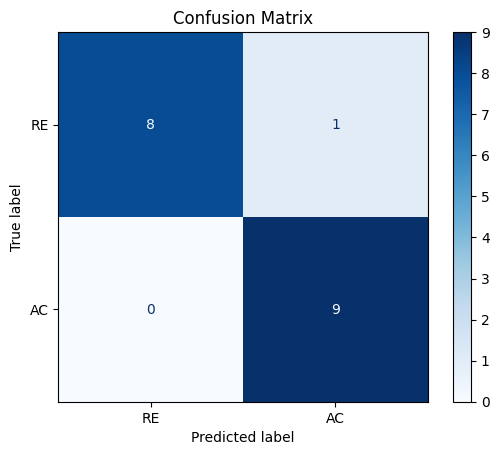

准确率:  0.9444444444444444
精确率:  0.9
召回率:  1.0
f1-score:  0.9473684210526316


In [78]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 输出混淆矩阵
print("混淆矩阵:")
print(cm)

# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['RE', 'AC'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print('准确率: ', accuracy_score(y_test, y_pred))
print('精确率: ', precision_score(y_test, y_pred))
print('召回率: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))